# Decision tree for classification
> A Summary of lecture "Machine Learning with Tree-Based Models in Python




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Decision tree for classification
- Classification-tree
    - Sequence of if-else questions about individual features.
    - **Objective**: infer class labels
    - Able to caputre non-linear relationships between features and labels
    - Don't require feature scaling(e.g. Standardization)
- Decision Regions
    - Decision region: region in the feature space where all instances are assigned to one class label
    - Decision Boundary: surface separating different decision regions
![decision region](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/decision_boundary.png?raw=1)

### Training first classification tree
In this exercise working with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository.Predicting whether a tumor is malignant or benign based on two features: the mean radius of the tumor (```radius_mean```) and its mean number of concave points (```concave points_mean```).

### Preprocess

In [4]:
wbc = pd.read_csv('/content/wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
wbc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [45]:
wbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

In [10]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [11]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


### Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [12]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


### Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

#### Helper function

'''Function producing a scatter plot of the instances contained in the 2D dataset (X,y) along with the decision regions of two trained classification models contained in the list 'models'.
Parameters
----------
X: pandas DataFrame corresponding to two numerical features
y: pandas Series corresponding the class labels
models: list containing two trained classifiers '''

In [15]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
def plot_labeled_decision_regions(X, y, models):
    if len(models) != 2:
        raise Exception('Models should be a list containing only two trained classifiers.')
    if not isinstance(X, pd.DataFrame):
        raise Exception('X has to be a pandas DataFrame with two numerical features.')
    if not isinstance(y, pd.Series):
        raise Exception('y has to be a pandas Series corresponding to the labels.')

    X_values = X.to_numpy()
    y_values = y.to_numpy()

    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X_values, y_values, clf=model, legend=2, ax=ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_xlim(X_values[:, 0].min()-1, X_values[:, 0].max()+1)
        ax[i].set_ylim(X_values[:, 1].min()-0.1, X_values[:, 1].max()+0.1)
    plt.tight_layout()

In [26]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)


# Fit logreg to the training set
logreg.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [27]:
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


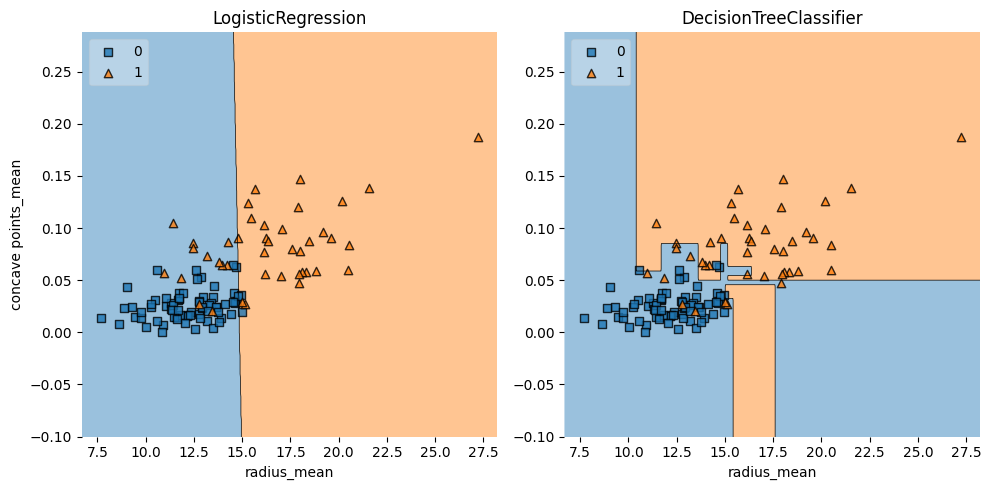

In [28]:
plot_labeled_decision_regions(X_test, y_test, clfs)


## Classification tree Learning
- Building Blocks of a Decision-Tree
    - Decision-Tree: data structure consisting of a hierarchy of nodes
    - Node: question or prediction
    - Three kinds of nodes
        - **Root**: no parent node, question giving rise to two children nodes.
        - **Internal node**: one parent node, question giving rise to two children nodes.
        - **Leaf**: one parent node, no children nodes --> prediction.
- Information Gain (IG)
![information gain](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/ig.png?raw=1)
$$ IG(\underbrace{f}_{\text{feature}}, \underbrace{sp}_{\text{split-point}} ) = I(\text{parent}) - \big( \frac{N_{\text{left}}}{N}I(\text{left}) + \frac{N_{\text{right}}}{N}I(\text{right})  \big) $$
    - Criteria to measure the impurity of a note $I(\text{node})$:
        - gini index
        - entropy
        - etc...
- Classification-Tree Learning
    - Nodes are grown recursively.
    - At each node, split the data based on:
        - feature $f$ and split-point $sp$ to maximize $IG(\text{node})$.
        - If $IG(\text{node}) = 0$, declare the node a leaf

### Using entropy as a criterion
In this exercise, training a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. And using all the 30 features in the dataset, which is split into 80% train and 20% test.



In [35]:
len(wbc.columns)

33

In [36]:
wbc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [40]:
X_30 = wbc[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
y1 = wbc['diagnosis']
y1 = y1.map({'M':1, 'B':0})

In [41]:
from sklearn.model_selection import train_test_split

X_train30, X_test30, y_train1, y_test1 = train_test_split(X_30, y1, test_size=0.2, random_state=1)

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train30, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

### Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named ```dt_gini```. The tree ```dt_gini``` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword ```'gini'```.

In [43]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train30, y_train1)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [44]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred_entropy = dt_entropy.predict(X_test30)
y_pred_gini = dt_gini.predict(X_test30)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test1, y_pred_entropy)
accuracy_gini = accuracy_score(y_test1, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using gini:  0.9473684210526315


## Decision tree for regression
- Information Criterion for Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$